In [ ]:
#This code installs the `ucimlrepo` package.
#pip install ucimlrepo

In [103]:
import pandas as pd
import numpy as np
import dmba
import seaborn as sns
import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.decomposition import PCA

# filter warnings
import warnings
warnings.filterwarnings("ignore")


import dmba
from dmba import classificationSummary, gainsChart, liftChart
from dmba.metric import AIC_score


In [57]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 
  


In [65]:
# variable information 
#breast_cancer_wisconsin_diagnostic.data
#create dataframe using both x and y
df = pd.concat([X, y], axis=1)

#save the data to a csv file
#df.to_csv('breast_cancer_wisconsin_diagnostic.csv', index=False)




### Basic information about the dataset


In [66]:
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [67]:
df.shape

(569, 31)

In [68]:
print("\nDataset summary:")
df.describe()



Dataset summary:


,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [69]:
print("\nMissing values in the dataset:")
df.isnull().sum()


Missing values in the dataset:


radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
Diagnosis             0
dtype: int64

In [70]:
#print the information about the dataset 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   radius1             569 non-null    float64
 1   texture1            569 non-null    float64
 2   perimeter1          569 non-null    float64
 3   area1               569 non-null    float64
 4   smoothness1         569 non-null    float64
 5   compactness1        569 non-null    float64
 6   concavity1          569 non-null    float64
 7   concave_points1     569 non-null    float64
 8   symmetry1           569 non-null    float64
 9   fractal_dimension1  569 non-null    float64
 10  radius2             569 non-null    float64
 11  texture2            569 non-null    float64
 12  perimeter2          569 non-null    float64
 13  area2               569 non-null    float64
 14  smoothness2         569 non-null    float64
 15  compactness2        569 non-null    float64
 16  concavit

#### Data Preparation


In [35]:
#replace the target values with 0 and 1
#y = np.where(y == 'M', 1, 0)
#df['diagnosis'] = y

### EDA

#### Distribution Analysis:

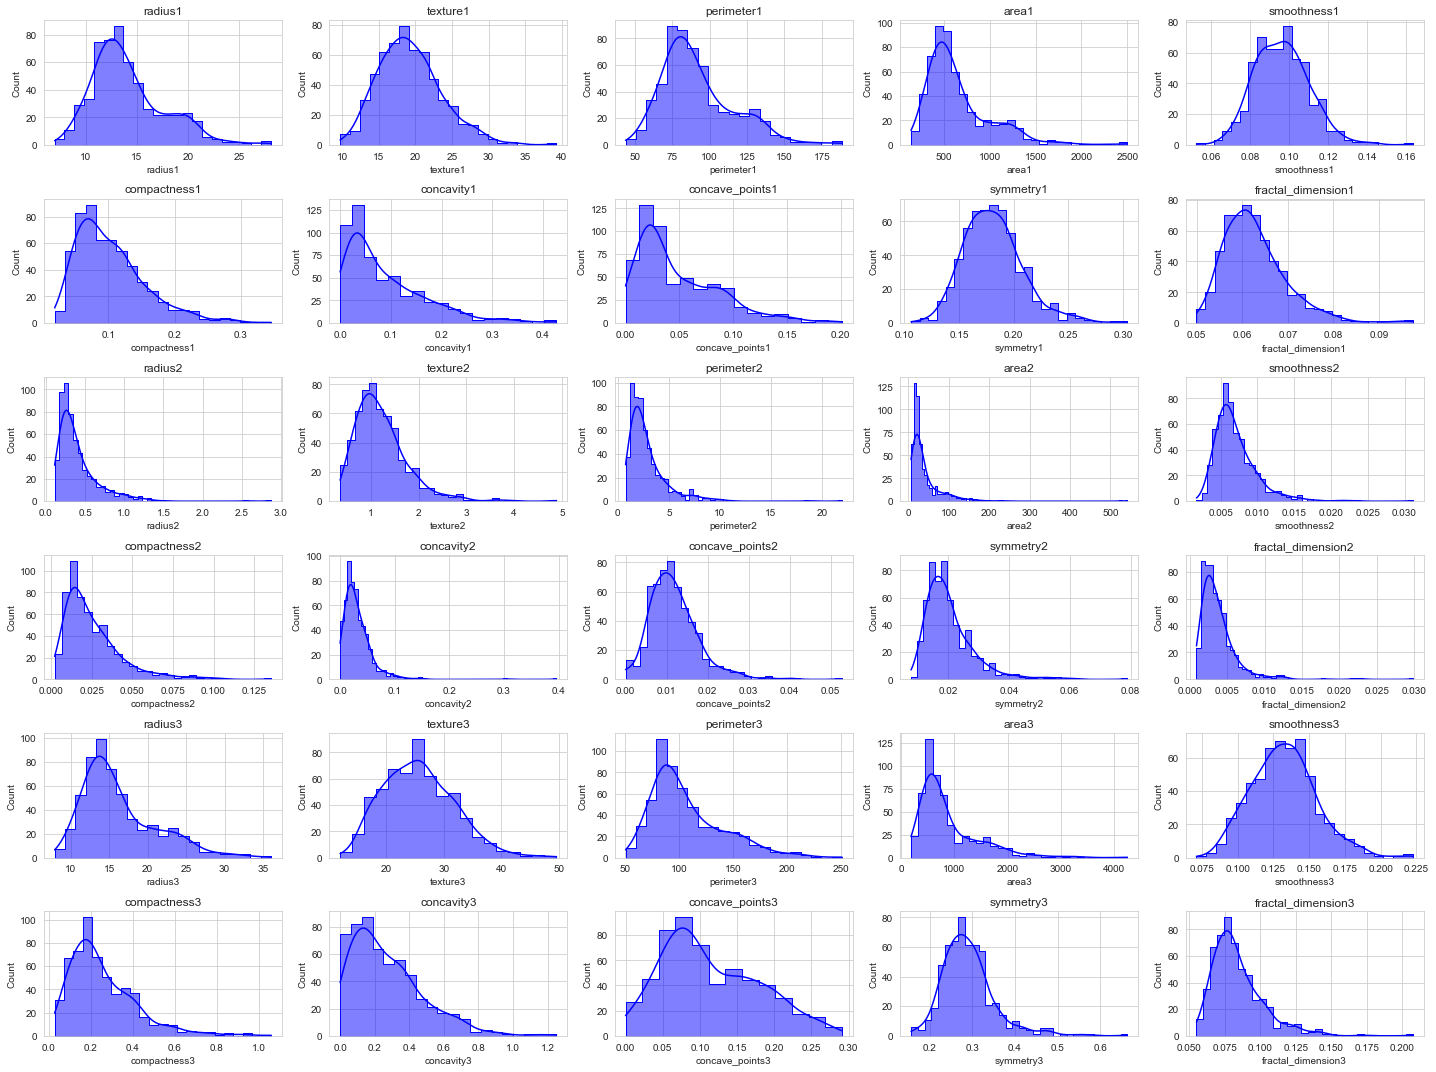

In [76]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a figure to hold the subplots
plt.figure(figsize=(20, 15))

# Plot histograms for each numeric feature to understand distributions
for index, column in enumerate(df.columns[:-1], 1):  # Exclude the 'diagnosis' column
    plt.subplot(6, 5, index)
    sns.histplot(df[column], kde=True, element='step', color='blue')
    plt.title(column)

plt.tight_layout()
plt.show()


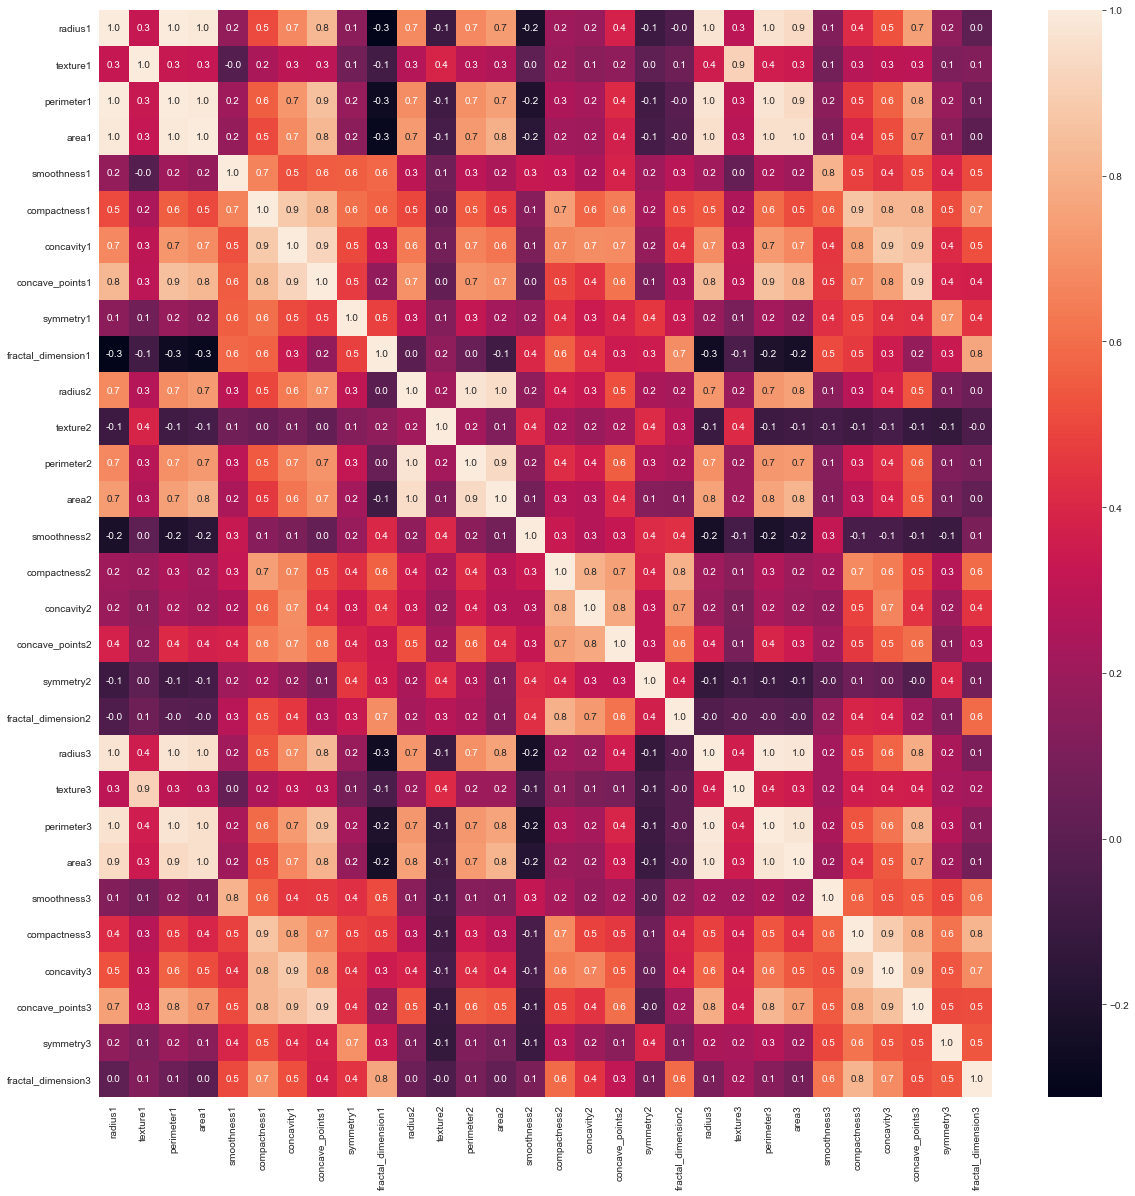

In [92]:
#HeatMap Correlations between the features
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, fmt='.1f')
plt.show()

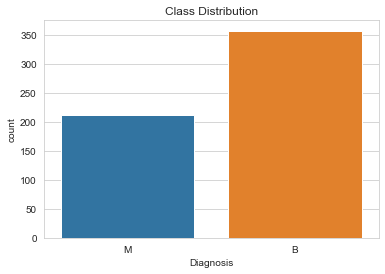

In [79]:
# Count plot for the 'diagnosis' to see class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Diagnosis', data=df)
plt.title('Class Distribution')
plt.show()

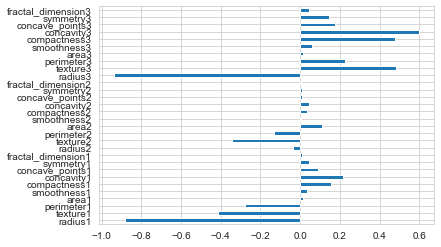

In [93]:
model = LogisticRegression()
model.fit(X, y)
feature_importance = pd.Series(model.coef_[0], index=X.columns)
feature_importance.plot(kind='barh')
plt.show()

In [81]:
# Normalization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [116]:
# Dimensionality Reduction using PCA
pca = PCA(n_components=2)  # Reduce dimensions to 2 for visualization or further analysis
X_pca = pca.fit_transform(X_scaled)



In [118]:
# Explained variance ratio for PCA components
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio for PCA Components:", explained_variance)

#The first two principal components explain approximately 44.27% and 18.97% 
#of the variance respectively. This indicates that these two components together 
#account for about 63.24% of the variance in the dataset.



Explained Variance Ratio for PCA Components: [0.44272026 0.18971182 0.09393163 0.06602135]


0.79238506

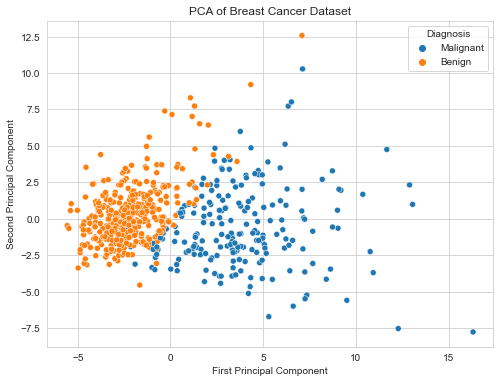

In [90]:
# Plotting the first two principal components
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y['Diagnosis'].map({'M': 'Malignant', 'B': 'Benign'}))
plt.title('PCA of Breast Cancer Dataset')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend(title='Diagnosis')
plt.show()

Great! Let's proceed with building a machine learning model using the PCA-reduced data. A common approach for classification tasks like this one (predicting breast cancer diagnosis) is to use logistic regression, which is straightforward and effective for binary classification problems.

I'll set up a logistic regression model using the PCA-reduced data, perform a train-test split, train the model, and then evaluate its performance with common metrics such as accuracy, precision, recall, and the F1-score.

Let's start by setting up the model:

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)




In [126]:
# Initializing and training the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)



LogisticRegression()

In [127]:
#Predicting on the test set
y_pred = log_reg.predict(X_test)


In [129]:
# Calculating performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label= 'M')
recall = recall_score(y_test, y_pred, pos_label= 'M')
f1 = f1_score(y_test, y_pred,pos_label= 'M')
conf_matrix = confusion_matrix(y_test, y_pred)

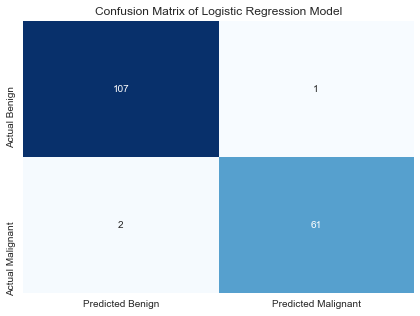

In [130]:
# Visualizing the confusion matrix
plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', cbar=False,
            xticklabels=['Predicted Benign', 'Predicted Malignant'],
            yticklabels=['Actual Benign', 'Actual Malignant'])
plt.title('Confusion Matrix of Logistic Regression Model')
plt.show()


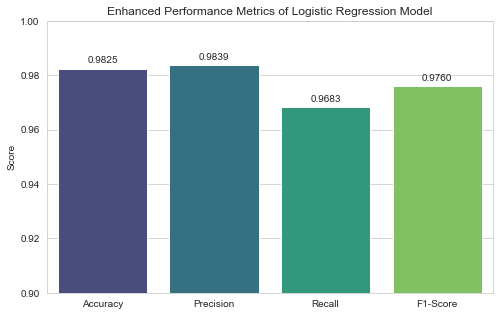

In [132]:
# Visualization of Performance Metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(8, 5))
barplot = sns.barplot(x=metrics, y=values, palette='viridis')
plt.ylim(0.9, 1)
plt.title('Enhanced Performance Metrics of Logistic Regression Model')
plt.ylabel('Score')
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.4f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', 
                     size=10, xytext=(0, 8),
                     textcoords='offset points')
plt.show()